<div>
    <h3>Quick report of life and death</h3>
    <h4>Source</h4>
    <div>git pull https://github.com/CSSEGISandData/COVID-19.git</div>
    <div>Country comparison of sum and rolling increase of reported cases and death.</div>
</div>

In [1]:
import pandas as pd
import datetime as dtt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
def infect(source, *arg):
    df = pd.read_csv(source)
    df.drop(['Lat','Long'], axis = 1, inplace = True)
    
    country = pd.DataFrame()
    for i in arg:
        c = df.loc[df['Country/Region'] == i]
        country = pd.concat([country,c])
        
    country = country.groupby('Country/Region').sum()
    country = country.T
    for i in arg:
        country[i+'_Daily'] = country[[i]].diff(axis = 0, periods = 1)
        
    country = country.applymap(lambda x: np.NaN if x <1 else x)
    country.dropna(axis = 0, how = 'all', inplace = True)
    country.columns.name = 'Country'
    country.index.name = 'Date'
    return country

def plot():
    col1 = sorted([i for i in sick.columns if 'Daily' in i])
    col2 = sorted([i for i in sick.columns if 'Daily' not in i])
    titles = ['Total reported cases',
             'Daily increase on cases',
             'Sum of death',
             'Daily increase on deaths']
    
    fig, ax = plt.subplots(4,1, figsize=(15,10))

    ax[0] = sick[col2].plot(kind ='bar', title = titles[0], ax = ax[0])
    sick[col1].plot(kind ='bar', title = titles[1], ax = ax[1])
    dead[col2].plot(kind ='bar', title = 'Sum of death', ax = ax[2])
    dead[col1].plot(kind ='bar', title = 'Daily increase on deaths', ax = ax[3])
    
    for i in [0,2]:
        ax[i].tick_params(bottom="off")
        ax[i].set_xticks([])
        ax[i].set_xticklabels([])
        ax[i].set_xlabel('')
    
    for i in range(4):
        ax[i].spines["right"].set_visible(False)
        ax[i].spines["top"].set_visible(False)
    
    plt.legend(loc = 2)
    plt.tight_layout()
    plt.show()
    
def report(n=-1):
    """
    n: start number of rows default last row (-1)
    m: secton stop default last row (0)
    """
    #setting the time section closure
    if n == -1:
        m = None
    else: m = n+1
    
    c = pd.concat([sick[n:m],dead[n:m]]).reset_index(drop=True)
    c.fillna(0, inplace = True)
    c =c.append(c.apply(lambda x: round(x[1]*100/x[0],2) if x[0] != 0 else 0), ignore_index = True)
    c = c[sorted(c.columns)]
    c[:2] = c[:2].apply(lambda x: x.astype('int'), axis = 0)
    c.set_index(pd.Series(['Reported cases/报告病例总数','Reported Deaths/报告死亡总数','Fatality (CFR)/病死率 %']), inplace = True)
    c.index.name = sick.index[n]
    return c

In [3]:
s0 = 'time_series_covid19_confirmed_global.csv'
s1 = 'time_series_covid19_deaths_global.csv'
arg = ['United Kingdom']
#arg = ['Hungary']
arg = ['China', 'United Kingdom','Germany']
sick = infect(s0,*arg)
dead = infect(s1,*arg)

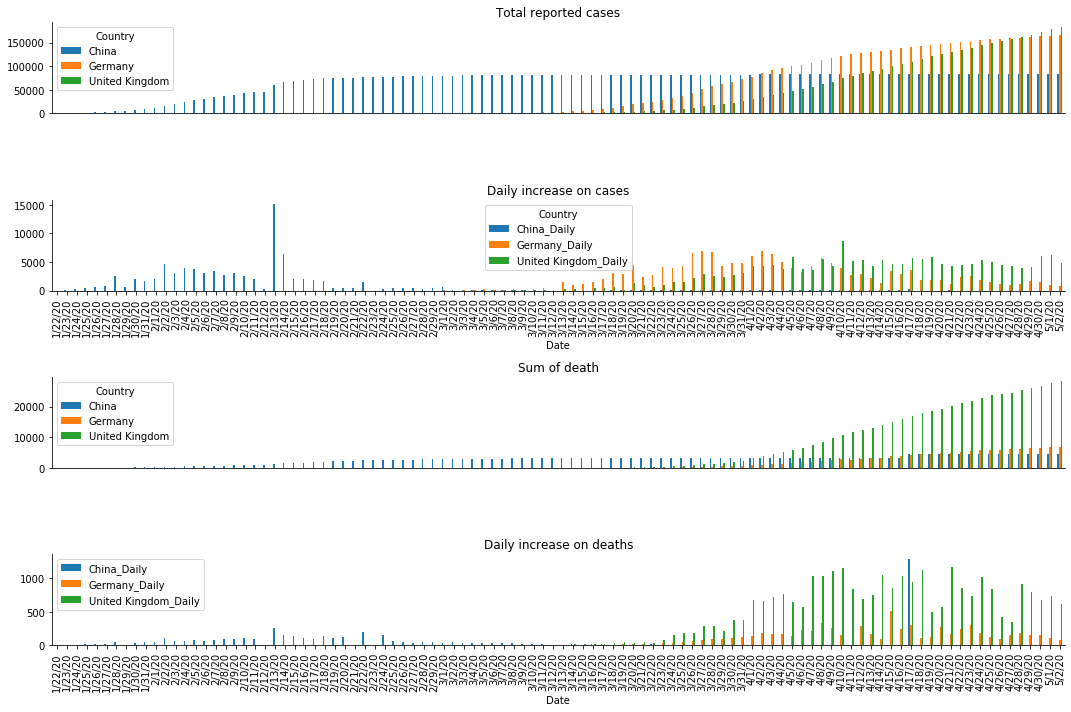

In [43]:
plot()

In [5]:
report()

Country,China,China_Daily,Germany,Germany_Daily,United Kingdom,United Kingdom_Daily
5/2/20,,,,,,
Reported cases/报告病例总数,83959.00,0.0,164967.00,890.00,183500.00,4815.00
Reported Deaths/报告死亡总数,4637.00,0.0,6812.00,76.00,28205.00,622.00
Fatality (CFR)/病死率 %,5.52,0.0,4.13,8.54,15.37,12.92


In [194]:
col1 = c =[i for i in sick.columns if 'Daily' in i]
col2 = c =[i for i in sick.columns if 'Daily' not in i]
    
"""sick[col2].plot(kind ='bar', figsize = (15,3), title = 'Total reported cases');
sick[col1].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on cases');
dead[col2].plot(kind='bar', figsize = (15,3), title = 'Sum of death');
dead[col1].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on deaths');"""

"sick[col2].plot(kind ='bar', figsize = (15,3), title = 'Total reported cases');\nsick[col1].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on cases');\ndead[col2].plot(kind='bar', figsize = (15,3), title = 'Sum of death');\ndead[col1].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on deaths');"

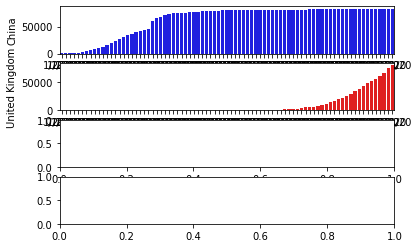

In [223]:
fig,ax = plt.subplots(4,1)

ax[0] = sns.barplot(x=sick.index,y='China', data = sick, color = 'blue', ax = ax[0])
ax[1] = sns.barplot(x=sick.index,y=sick['United Kingdom'], color ='red', ax = ax[1])

plt.tightlayout()
plt.show()

In [16]:
ax.spines

NameError: name 'ax' is not defined